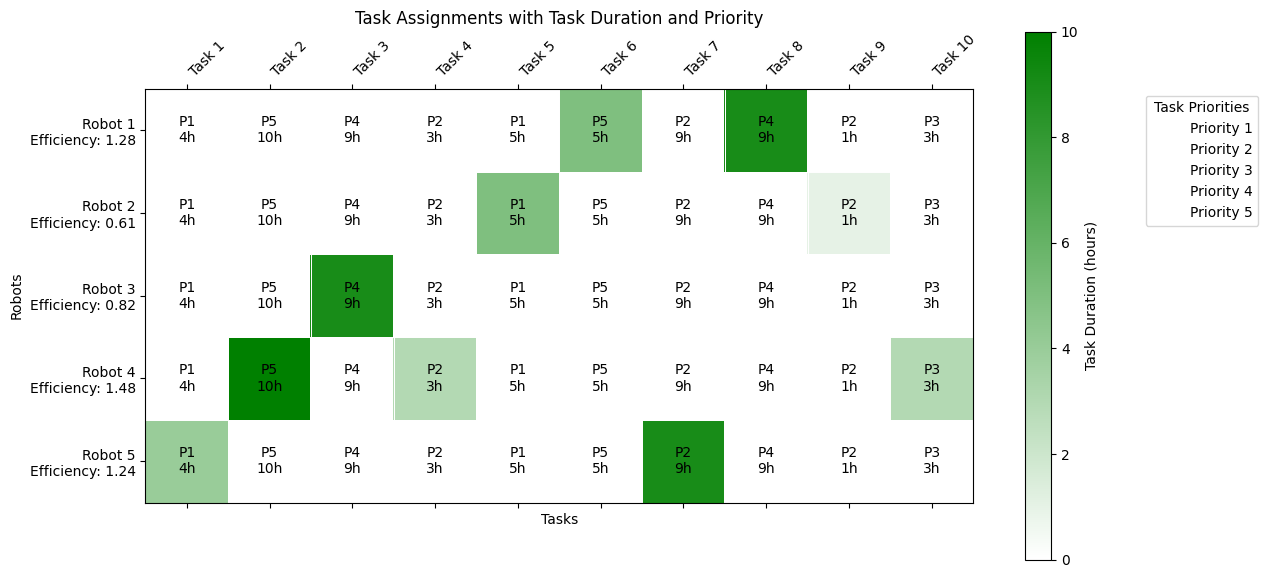

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)
    task_priorities = np.random.randint(1, 6, size=num_tasks)
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)
    return task_durations, task_priorities, robot_efficiencies

# Fitness function to evaluate each solution
def evaluate_fitness(solution, task_durations, robot_efficiencies):
    total_time = [0] * len(robot_efficiencies)
    for task_idx, robot_idx in enumerate(solution):
        total_time[robot_idx] += task_durations[task_idx] / robot_efficiencies[robot_idx]
    Ttotal = max(total_time)
    B = np.std(total_time)
    return Ttotal + B

# Selection function to select parents for the next generation
def select_parents(population, fitness_scores, num_parents):
    parents_indices = np.argsort(fitness_scores)[:num_parents]
    parents = [population[i] for i in parents_indices]
    return parents

# Crossover function to produce offspring
def crossover(parents, offspring_size):
    offspring = []
    for _ in range(offspring_size):
        parent1_idx, parent2_idx = np.random.choice(len(parents), 2, replace=False)
        parent1 = parents[parent1_idx]
        parent2 = parents[parent2_idx]
        crossover_point = np.random.randint(len(parent1))
        child = np.hstack((parent1[:crossover_point], parent2[crossover_point:]))
        offspring.append(child)
    return offspring

# Mutation function to introduce variation
def mutate(offspring, num_mutations=1):
    for idx in range(len(offspring)):
        for _ in range(num_mutations):
            gene_idx = np.random.randint(len(offspring[idx]))
            new_value = np.random.randint(len(robot_efficiencies))
            offspring[idx][gene_idx] = new_value
    return offspring

# Genetic Algorithm main process
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies, population_size=50, n_generations=100):
    # Initialize population
    population = [np.random.randint(0, len(robot_efficiencies), size=len(task_durations)) for _ in range(population_size)]

    # Run GA for a certain number of generations
    for generation in range(n_generations):
        fitness_scores = [evaluate_fitness(individual, task_durations, robot_efficiencies) for individual in population]

        parents = select_parents(population, fitness_scores, num_parents=population_size//2)
        offspring_crossover = crossover(parents, offspring_size=population_size - len(parents))
        offspring_mutation = mutate(offspring_crossover)

        # Creating the new population based on the parents and offspring.
        population[:len(parents)] = parents
        population[len(parents):] = offspring_mutation

    # Get the best solution
    fitness_scores = [evaluate_fitness(individual, task_durations, robot_efficiencies) for individual in population]
    best_solution_index = np.argmin(fitness_scores)
    best_solution = population[best_solution_index]
    return best_solution

# Improved visualization function
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "green"])
    cax = ax.matshow(grid, cmap=cmap)

    # Add borders to the cells
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            ax.axhline(i-0.5, color='white', linewidth=0.5)
            ax.axvline(j-0.5, color='white', linewidth=0.5)
            if grid[i, j] == 0:
                ax.text(j, i, f'P{task_priorities[j]}\n{task_durations[j]}h', va='center', ha='center', color='black')  # Add cell names

    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotating each cell with priority and duration
    for i, (robot_idx, task_idx) in enumerate(zip(solution, range(len(task_durations)))):
        ax.text(task_idx, robot_idx, f'P{task_priorities[task_idx]}\n{task_durations[task_idx]}h', va='center', ha='center', color='black')

    # Setting tick positions and labels for x and y axes
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))

    ax.set_xticklabels([f'Task {i+1}' for i, p in enumerate(task_priorities)], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1}\nEfficiency: {eff:.2f}' for i, eff in enumerate(robot_efficiencies)])

    # Correcting the tick positioning using FixedLocator
    ax.xaxis.set_major_locator(plt.FixedLocator(np.arange(len(task_durations))))
    ax.yaxis.set_major_locator(plt.FixedLocator(np.arange(len(robot_efficiencies))))

    # Improving plot aesthetics
    plt.grid(visible=False)
    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')
    plt.tight_layout()

    # Creating a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.show()

# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
